# Ejercicio integrador

A partir del archivo <i>incident_2017.csv</i> realizar un proceso de data mining.

- Leer los datos
- Estudiar y evaluar la información que puede obtenerse de los datos
- Evaluar y tratar valores faltantes justificando las decisiones
- Evaluar y tratar valores atípicos justificando las decisiones
- Obtener a través de diferentes consultas y cálculos estadísticas la mayor cantidad de <b>información útil</b>
- Utilizar diferentes técnicas de visualización para representar la información obtenida de manera eficiente y legible
- Detallar en cada caso las conclusiones obtenidas de la información

In [4]:
import pandas as pd
import requests
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

path = r"C:\Users\Nicolas\Proyectos Programacion\Base-de-Datos-II\base-de-datos-ii\data\incident_2017.csv"

df = pd.read_csv(path, sep=",")
df

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£)
0,000468-01012017,01/01/2017,2017,22:20:46,22,Fire,Primary Fire,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,Euston,318.0,Soho,NaN,NaN,1.0,1.0,1.0,1.0,326.0
1,000281-01012017,01/01/2017,2017,13:20:35,13,False Alarm,AFA,NaN,Other Residential,Retirement/Old Persons Home,...,Fulham,267.0,Fulham,457.0,Battersea,2.0,2.0,2.0,1.0,326.0
2,000360-01012017,01/01/2017,2017,17:58:36,17,False Alarm,AFA,NaN,Dwelling,Self contained Sheltered Housing,...,Lambeth,307.0,Lambeth,NaN,NaN,1.0,2.0,2.0,1.0,326.0
3,000342-01012017,01/01/2017,2017,16:29:04,16,False Alarm,False alarm - Good intent,NaN,Non Residential,Restaurant/cafe,...,Euston,168.0,Euston,342.0,Islington,3.0,3.0,3.0,2.0,652.0
4,000327-01012017,01/01/2017,2017,16:00:10,16,False Alarm,AFA,NaN,Other Residential,Hotel/motel,...,Lambeth,677.0,Lambeth,NaN,NaN,1.0,1.0,1.0,1.0,326.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483383,115894-31082021,31/08/2021,2021,07:22:03,7,False Alarm,AFA,NaN,Dwelling,Self contained Sheltered Housing,...,Ealing,267.0,Ealing,309.0,Southall,2.0,2.0,2.0,1.0,352.0
483384,115919-31082021,31/08/2021,2021,09:06:17,9,False Alarm,AFA,NaN,Non Residential,Restaurant/cafe,...,Harrow,433.0,Northolt,NaN,NaN,1.0,1.0,1.0,1.0,352.0
483385,115828-31082021,31/08/2021,2021,00:17:46,0,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - 10 or more s...,...,Battersea,256.0,Battersea,301.0,Wandsworth,5.0,5.0,5.0,1.0,352.0
483386,115859-31082021,31/08/2021,2021,03:58:17,3,Special Service,Special Service,Assist other agencies,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,...,Park Royal,310.0,Park Royal,NaN,NaN,1.0,1.0,1.0,2.0,704.0


In [5]:
df.dtypes

IncidentNumber                             object
DateOfCall                                 object
CalYear                                     int64
TimeOfCall                                 object
HourOfCall                                  int64
IncidentGroup                              object
StopCodeDescription                        object
SpecialServiceType                         object
PropertyCategory                           object
PropertyType                               object
AddressQualifier                           object
Postcode_full                              object
Postcode_district                          object
UPRN                                        int64
USRN                                        int64
IncGeo_BoroughCode                         object
IncGeo_BoroughName                         object
ProperCase                                 object
IncGeo_WardCode                            object
IncGeo_WardName                            object


In [6]:
# seleccionamos los faltantes, reemplazando los "?", utilizamos este metodo al encontrar missing values en Python.
faltantes =[]
# buscamos por columna
for column in df.columns:
    item = {}
    # igualamos las columnas
    item["column"] = column
    # pasamos a df el tipo como dato
    item["type"] = df[column].dtypes
    # sacamos el porcentaje de la columna faltante x 100
    item["percentage"] = np.mean(df[column] == "?")*100
    # sumamos la columna cantidad faltante
    item["quantity"] = np.sum(df[column] == "?")
    # agregamos los cambios
    faltantes.append(item)

# creamos el dataframe nuevo con pandas
faltantes_df = pd.DataFrame(faltantes)
# llamamos
faltantes_df

,column,type,percentage,quantity
0,IncidentNumber,object,0.0,0
1,DateOfCall,object,0.0,0
2,CalYear,int64,0.0,0
3,TimeOfCall,object,0.0,0
4,HourOfCall,int64,0.0,0
5,IncidentGroup,object,0.0,0
6,StopCodeDescription,object,0.0,0
7,SpecialServiceType,object,0.0,0
8,PropertyCategory,object,0.0,0
9,PropertyType,object,0.0,0


<AxesSubplot: >

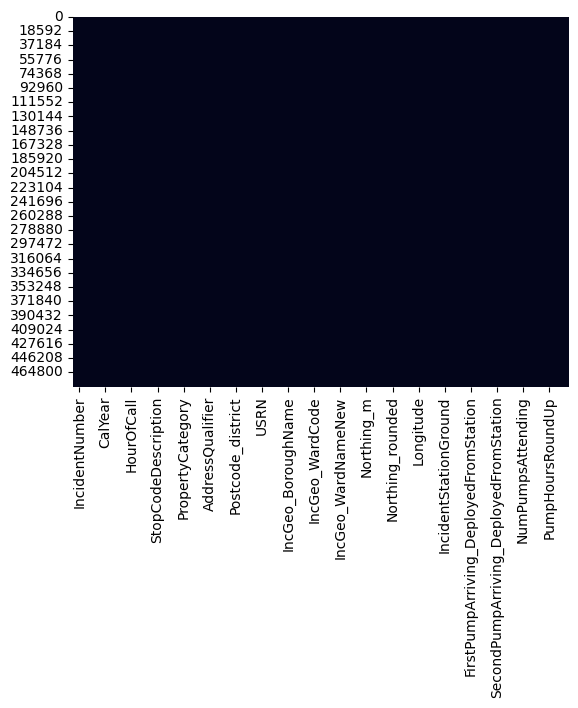

In [21]:
sns.heatmap(df.isin(['?']), cbar=False)

In [15]:
# agrupamos los datos faltantes que tenga porcentaje mayor a 0
missing_df = faltantes_df.loc[faltantes_df["percentage"] > 0]
missing_df

,column,type,percentage,quantity


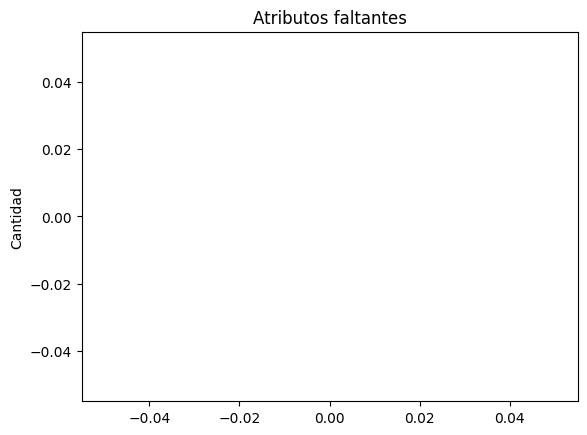

In [29]:
# Ordenar por cantidad descendente
faltantes_df = faltantes_df.sort_values('quantity', ascending=False)

# Filtrar por cantidad mayor a 0
df_fl_c = faltantes_df.loc[(faltantes_df['quantity'] > 0)]
# Graficar
plt.bar(df_fl_c["column"], df_fl_c["quantity"])
plt.ylabel('Cantidad')
plt.title('Atributos faltantes')
plt.show() 

No existen datos faltantes, por lo tanto no se pueden agrupar por ningun dato.

In [16]:
df.describe()

,CalYear,HourOfCall,UPRN,USRN,Easting_m,Northing_m,Easting_rounded,Northing_rounded,FirstPumpArriving_AttendanceTime,SecondPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£)
count,483388.000000,483388.000000,4.833880e+05,4.833880e+05,233220.000000,233220.000000,483388.000000,483388.000000,454208.000000,183411.000000,479024.000000,479024.000000,480963.000000,480800.000000,480800.000000
mean,2018.847348,13.463745,2.235548e+10,2.036370e+07,530648.945819,180396.331297,530674.412066,180523.223166,310.304085,387.814117,1.384202,1.562982,1.614789,1.378184,465.046886
std,1.355848,6.254622,4.747941e+10,4.745239e+06,10353.554670,7500.614072,9729.712484,7402.129794,131.941193,146.985053,0.728040,0.877915,1.620285,6.634059,2217.450076
min,2017.000000,0.000000,0.000000e+00,4.200740e+06,503582.000000,155998.000000,503550.000000,155950.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,326.000000
25%,2018.000000,9.000000,0.000000e+00,2.040089e+07,525023.000000,175865.000000,525150.000000,176150.000000,228.000000,294.000000,1.000000,1.000000,1.000000,1.000000,333.000000
50%,2019.000000,14.000000,0.000000e+00,2.120106e+07,530814.000000,181003.000000,530950.000000,181050.000000,292.000000,364.000000,1.000000,1.000000,1.000000,1.000000,339.000000
75%,2020.000000,19.000000,1.002439e+10,2.210086e+07,536996.000000,185095.000000,536450.000000,185250.000000,369.000000,452.000000,2.000000,2.000000,2.000000,1.000000,346.000000
max,2021.000000,23.000000,2.000044e+11,9.999042e+07,560461.000000,200899.000000,611150.000000,302450.000000,1200.000000,1200.000000,14.000000,14.000000,319.000000,2163.000000,709464.000000


In [17]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CalYear                              2.000000e+00
HourOfCall                           1.000000e+01
UPRN                                 1.002439e+10
USRN                                 1.699969e+06
Easting_m                            1.197300e+04
Northing_m                           9.230000e+03
Easting_rounded                      1.130000e+04
Northing_rounded                     9.100000e+03
FirstPumpArriving_AttendanceTime     1.410000e+02
SecondPumpArriving_AttendanceTime    1.580000e+02
NumStationsWithPumpsAttending        1.000000e+00
NumPumpsAttending                    1.000000e+00
PumpCount                            1.000000e+00
PumpHoursRoundUp                     0.000000e+00
Notional Cost (£)                    1.300000e+01
dtype: float64


In [18]:
# Rangos normales de datos
rango_inferior = Q1 - 1.5 * IQR
rango_superior = Q3 + 1.5 * IQR

print("Rango superior")
print(rango_inferior)
print("Rango inferior")
print(rango_superior)

Rango superior
CalYear                              2.015000e+03
HourOfCall                          -6.000000e+00
UPRN                                -1.503658e+10
USRN                                 1.785094e+07
Easting_m                            5.070635e+05
Northing_m                           1.620200e+05
Easting_rounded                      5.082000e+05
Northing_rounded                     1.625000e+05
FirstPumpArriving_AttendanceTime     1.650000e+01
SecondPumpArriving_AttendanceTime    5.700000e+01
NumStationsWithPumpsAttending       -5.000000e-01
NumPumpsAttending                   -5.000000e-01
PumpCount                           -5.000000e-01
PumpHoursRoundUp                     1.000000e+00
Notional Cost (£)                    3.135000e+02
dtype: float64
Rango inferior
CalYear                              2.023000e+03
HourOfCall                           3.400000e+01
UPRN                                 2.506097e+10
USRN                                 2.465081e+07
Easti

In [19]:
# Mostrar si un valor es atípico o no
df_outliers = (df < rango_inferior) | (df > rango_superior)
df_outliers

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_37876\1770940656.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_outliers = (df < rango_inferior) | (df > rango_superior)


,AddressQualifier,CalYear,DateOfCall,Easting_m,Easting_rounded,FRS,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,HourOfCall,IncGeo_BoroughCode,...,PropertyType,PumpCount,PumpHoursRoundUp,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,SpecialServiceType,StopCodeDescription,TimeOfCall,UPRN,USRN
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483383,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
483384,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
483385,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
483386,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


<AxesSubplot: >

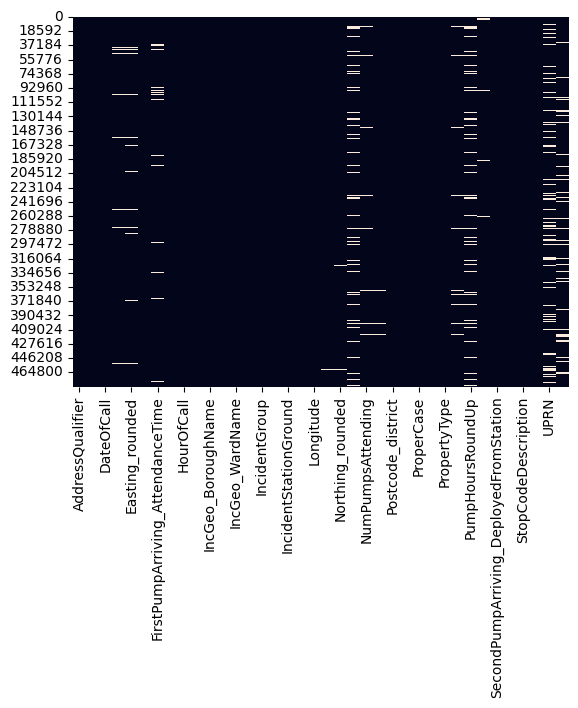

In [20]:
#Mostar mapa de calor para identificar los valores atípicos
sns.heatmap(df_outliers, cbar=False)

In [22]:
df.groupby('DateOfCall')['TimeOfCall'].count()

DateOfCall
01/01/2017    276
01/01/2018    287
01/01/2019    304
01/01/2020    336
01/01/2021    323
             ... 
31/10/2020    299
31/12/2017    284
31/12/2018    244
31/12/2019    254
31/12/2020    297
Name: TimeOfCall, Length: 1704, dtype: int64

In [27]:
print("Maxima Hora de Llamada")
df['HourOfCall'].max()


Maxima Hora de Llamada


23

In [28]:
print("Minima Hora de Llamada")
df['HourOfCall'].min()

Minima Hora de Llamada


0

Podemos concluir que se analizo el archivo incident_2017.csv de manera exitosa. Se comprobo el tipo de atributos e informacion general. Se analizo datos faltantes, en este caso no se encontraron coincidencias, por lo tanto no pudimos agrupar nada. Se analizo datos atipicos de los cuales hubo coincidencias y se analizo con el rango intercuartil, posteriormente se grafico. Y finalmente se utilizaron varias operaciones de agrupamiento como count() y max() - min().